In [3]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import anndata as ad
import requests
import urllib.request
import warnings

os.chdir("/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_Linda_RNA/post_analysis/cell_typist/check_unannotated")


# Define gene sets

In [23]:
gene_list = pd.read_csv("First level gene list.csv")
gene_list


,Excitatory neurons,Inhibitory neurons,Astrocytes,Microglia,Oligos,Endothelial cells,Ependymal cells,Neuroblast/progenitors
0,Slc17a7,Gad1,Aldh1l1,Aif1,Mbp,Cldn5,Foxj1,Sox4
1,Slc17a6,Gad2,Gfap,Csf1r,Olig1,Cxcl12,Tuba1a,Eomes
2,Camk2a,Slc32a1,Aqp4,Cx3cr1,Olig2,Pdgfrb,Prom1,Sox2
3,Grin1,Syt6,Slc1a2,P2ry12,Mog,Cspg4,Nes,Nfib
4,Gria1,Erbb4,Sox9,Hexb,Plp1,Efemp1,Calml4,Neurod2


# Load data

In [10]:
# DATA dirs
model_type = "Isocortex_Hippocampus"
sample_name = "Emx1_Ctrl"

data_path = f"/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_Linda_RNA/post_analysis/cell_typist/results_Mouse_{model_type}"

adata_paths = {
    "Emx1_Ctrl": f"{data_path}/Emx1_Ctrl_annotated.h5ad",
    "Emx1_Mut": f"{data_path}/Emx1_Mut_annotated.h5ad",
    "Nestin_Ctrl": f"{data_path}/Nestin_Ctrl_annotated.h5ad",
    "Nestin_Mut": f"{data_path}/Nestin_Mut_annotated.h5ad"
}

# Load AnnData objects into a dictionary
adata_dict = {}
for key, path in adata_paths.items():
    print(f"Loading AnnData from {path}")
    adata_dict[key] = sc.read_h5ad(path)
    print(f"AnnData object {key} contains {adata_dict[key].n_obs} cells and {adata_dict[key].n_vars} genes")

Loading AnnData from /beegfs/scratch/ric.broccoli/kubacki.michal/SRF_Linda_RNA/post_analysis/cell_typist/results_Mouse_Isocortex_Hippocampus/Emx1_Ctrl_annotated.h5ad


AnnData object Emx1_Ctrl contains 4707 cells and 26071 genes
Loading AnnData from /beegfs/scratch/ric.broccoli/kubacki.michal/SRF_Linda_RNA/post_analysis/cell_typist/results_Mouse_Isocortex_Hippocampus/Emx1_Mut_annotated.h5ad
AnnData object Emx1_Mut contains 6242 cells and 26302 genes
Loading AnnData from /beegfs/scratch/ric.broccoli/kubacki.michal/SRF_Linda_RNA/post_analysis/cell_typist/results_Mouse_Isocortex_Hippocampus/Nestin_Ctrl_annotated.h5ad
AnnData object Nestin_Ctrl contains 9512 cells and 27564 genes
Loading AnnData from /beegfs/scratch/ric.broccoli/kubacki.michal/SRF_Linda_RNA/post_analysis/cell_typist/results_Mouse_Isocortex_Hippocampus/Nestin_Mut_annotated.h5ad
AnnData object Nestin_Mut contains 9237 cells and 26095 genes


# Check Biomarkers

In [11]:
# Plot marker genes
sal_sample = "Emx1_Ctrl"

In [12]:
adata = adata_dict[sal_sample]

In [13]:
adata

AnnData object with n_obs × n_vars = 4707 × 26071
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden_0.05', 'leiden_0.13', 'leiden_0.22', 'leiden_0.3', 'leiden_0.38', 'leiden_0.47', 'leiden_0.55', 'leiden_0.63', 'leiden_0.72', 'leiden_0.8', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'prob_predicted_labels', 'prob_over_clustering', 'prob_majority_voting', 'prob_conf_score', 'prob_Astro', 'prob_CA1-ProS', 'prob_CA2-IG-FC', 'prob_CA3', 'prob_CR', 'prob_CT SUB', 'prob_Car3', 'prob_DG', 'prob_Endo', 'prob_L2 IT ENTl', 'prob_L2 IT ENTm', 'prob_L2/3 IT CTX', 'prob_L2/3 IT ENTl', 'prob_L2/3 IT PPP', 'prob_L2/3 IT RHP', 'prob_L3 IT ENT', 'prob_L4 RSP-ACA', 'prob_L4/5 IT CTX', 'prob_L5 IT CTX', 'prob_L5 PPP', 'prob_L5 PT CTX', 'prob_L5/6 IT TPE-ENT', 'prob_L5/6 NP CTX', 'prob_L6 CT CTX', 'prob_L6 IT CTX', 'prob_L6 IT ENTl', 'prob_L6b CTX', 'prob_L6b/CT ENT', 'prob_Lamp5', 'prob_Meis2', 'prob_Micro-PVM', 'prob_NP PPP',

In [16]:
with pd.option_context("display.max_columns", None):
    display(adata.obs.head())

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden_0.05,leiden_0.13,leiden_0.22,leiden_0.3,leiden_0.38,leiden_0.47,leiden_0.55,leiden_0.63,leiden_0.72,leiden_0.8,predicted_labels,over_clustering,majority_voting,conf_score,prob_predicted_labels,prob_over_clustering,prob_majority_voting,prob_conf_score,prob_Astro,prob_CA1-ProS,prob_CA2-IG-FC,prob_CA3,prob_CR,prob_CT SUB,prob_Car3,prob_DG,prob_Endo,prob_L2 IT ENTl,prob_L2 IT ENTm,prob_L2/3 IT CTX,prob_L2/3 IT ENTl,prob_L2/3 IT PPP,prob_L2/3 IT RHP,prob_L3 IT ENT,prob_L4 RSP-ACA,prob_L4/5 IT CTX,prob_L5 IT CTX,prob_L5 PPP,prob_L5 PT CTX,prob_L5/6 IT TPE-ENT,prob_L5/6 NP CTX,prob_L6 CT CTX,prob_L6 IT CTX,prob_L6 IT ENTl,prob_L6b CTX,prob_L6b/CT ENT,prob_Lamp5,prob_Meis2,prob_Micro-PVM,prob_NP PPP,prob_NP SUB,prob_Oligo,prob_Pvalb,prob_SMC-Peri,prob_SUB-ProS,prob_Sncg,prob_Sst,prob_Sst Chodl,prob_VLMC,prob_Vip
AAACAGCCAAGCTTTG-1,1675,1675,2798.0,6.0,0.214439,3,5,8,8,7,9,8,9,10,10,Astro,8,Astro,0.999859,Astro,8,Astro,0.999859,0.999859,9.465010e-08,4.926998e-09,3.349273e-07,8.642745e-07,0.000014,4.170889e-07,5.936318e-07,1.030039e-07,0.000001,2.092588e-07,4.560527e-07,0.000011,1.221158e-06,0.000005,2.803802e-08,2.967605e-07,0.000006,0.000132,0.000002,1.317411e-06,6.716765e-05,2.107540e-08,0.000028,0.000016,9.137208e-07,3.740285e-06,7.265892e-07,0.000032,1.350251e-07,0.000005,2.430633e-08,8.036929e-07,2.514345e-09,0.001802,3.227686e-07,2.198726e-08,4.016833e-09,4.085168e-08,1.710999e-08,0.000001,0.000018
AAACAGCCATAAGGAC-1,769,769,927.0,5.0,0.539374,1,2,2,1,0,0,0,0,0,0,Unassigned,0,Unassigned,0.080232,Unassigned,0,Unassigned,0.080232,0.015941,9.120108e-03,1.030553e-03,4.558789e-04,3.055897e-03,0.000085,5.277979e-05,3.647690e-03,3.997313e-04,0.000072,8.767341e-05,3.315219e-06,0.001972,8.360762e-05,0.000171,1.628501e-04,1.189768e-04,0.080232,0.000002,0.001131,6.996187e-05,5.792753e-05,4.680679e-03,0.040860,0.000053,1.530045e-04,2.908194e-05,7.066208e-04,0.000511,2.007192e-04,0.003572,1.746161e-05,3.641213e-04,3.957453e-06,0.016727,3.699427e-03,2.208934e-05,4.656486e-05,9.987961e-06,1.004013e-05,0.010729,0.000532
AAACATGCAACTAGGG-1,5781,5781,23234.0,13.0,0.055952,0,1,1,5,6,6,6,4,4,5,CA3|DG,33,DG,0.982584,CA3|DG,33,DG,0.982584,0.000266,8.040768e-06,2.868526e-04,8.264685e-01,2.164625e-04,0.000234,8.058293e-04,9.825836e-01,5.439013e-04,0.000134,1.316980e-04,3.021223e-04,0.000274,1.428200e-05,0.000028,1.122013e-04,1.233108e-03,0.000419,0.000029,0.000387,1.056593e-04,2.307912e-03,2.025428e-04,0.000016,0.000149,2.929652e-05,1.800248e-03,1.706408e-04,0.000378,5.239575e-04,0.001768,3.556240e-04,1.931263e-04,2.969259e-04,0.001013,6.741046e-04,1.065116e-04,2.283989e-04,8.943782e-05,6.670870e-04,0.000331,0.000107
AAACATGCAAGTCGCT-1,520,520,732.0,9.0,1.229508,1,2,2,1,0,0,0,0,18,19,Oligo,46,Oligo,0.998595,Oligo,46,Oligo,0.998595,0.000050,1.383971e-05,2.373852e-05,8.273798e-07,2.907764e-05,0.000006,6.261300e-07,3.536581e-08,5.062075e-05,0.000002,3.043945e-06,1.863830e-08,0.000138,2.685407e-06,0.000003,4.348550e-07,7.701215e-07,0.000047,0.000003,0.000001,7.274110e-07,5.620890e-07,1.330949e-06,0.000039,0.000002,4.119652e-07,1.254216e-07,3.106817e-06,0.000003,6.951073e-07,0.000099,2.200291e-06,4.655865e-05,9.985947e-01,0.000011,2.671866e-04,4.825501e-06,4.468728e-07,8.554119e-07,1.413765e-05,0.000039,0.000015
AAACATGCACCTAATG-1,14784,14775,465926.0,238.0,0.051081,0,0,0,0,2,1,1,1,1,1,Unassigned,28,Unassigned,0.110447,Unassigned,28,Unassigned,0.110447,0.000282,1.906009e-03,2.138494e-04,1.637697e-03,1.022453e-04,0.000144,7.624317e-05,1.058654e-03,2.528354e-04,0.000258,4.593865e-04,6.857631e-06,0.000899,9.144899e-07,0.000133,2.350498e-05,1.904446e-04,0.108210,0.000054,0.000117,1.113574e-04,5.013529e-05,3.815922e-05,0.000002,0.000029,1.512357e-04,2.893972e-04,3.224344e-05,0.001808,2.046141e-04,0.000749,1.661875e-04,2.714187e-04,1.104467e-01,0.000041,9.594879e-04,2.808330e-03,5.684069e-04,2.671260e-04,2.078913e-04,0.000595,0.000036


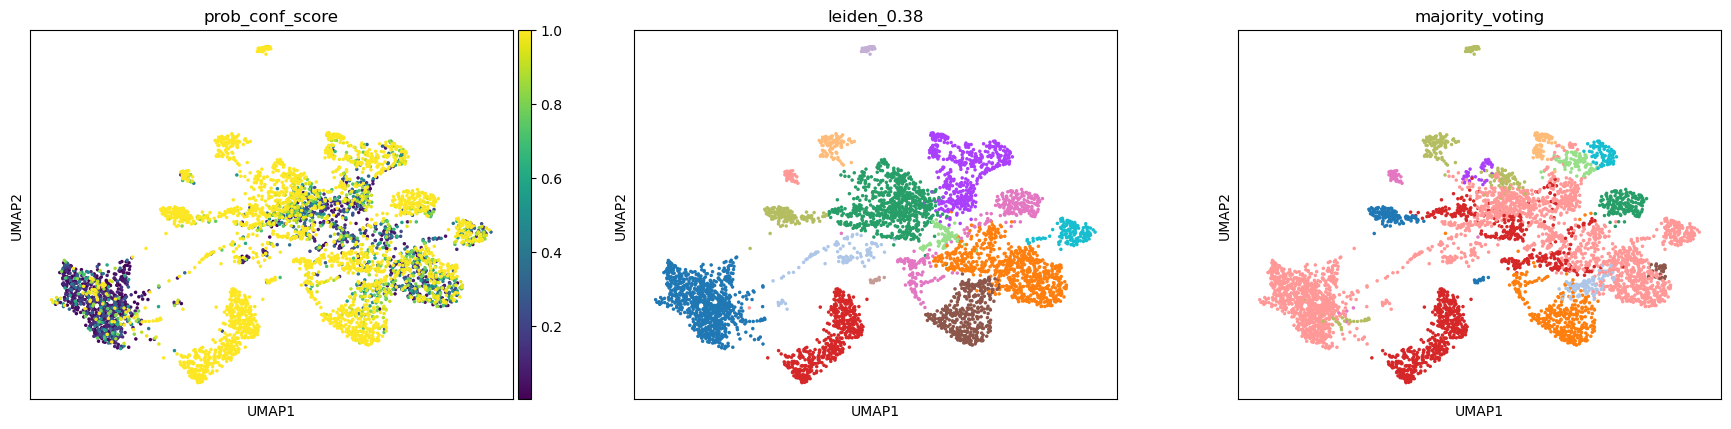

In [20]:
sc.pl.umap(adata, color = ['prob_conf_score', 'leiden_0.38', 'majority_voting'], legend_loc = 'none')

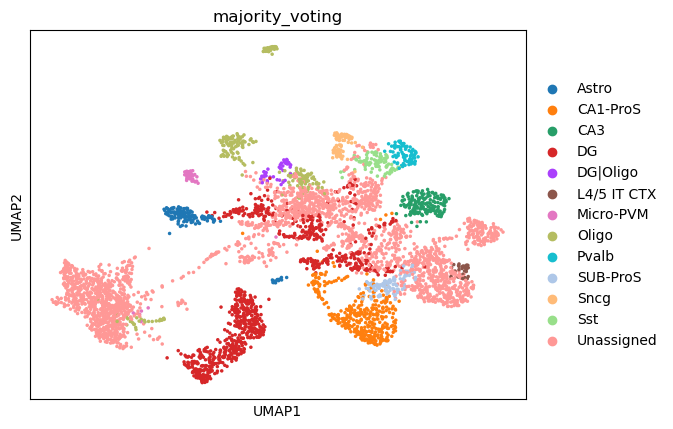

In [39]:
sc.pl.umap(adata, color = 'majority_voting', legend_loc = 'right margin')

In [31]:
cell_types = gene_list.columns.tolist()

In [32]:
cell_types

['Excitatory neurons',
 'Inhibitory neurons',
 'Astrocytes',
 'Microglia',
 'Oligos',
 'Endothelial cells',
 'Ependymal cells',
 'Neuroblast/progenitors']

In [ ]:
selected_cell_type = 'Excitatory neurons'  # Choose the cell type here

In [ ]:
markers_dict = {col: gene_list[col].dropna().tolist() for col in gene_list.columns}
markers_dict

{'Excitatory neurons': ['Slc17a7', 'Slc17a6', 'Camk2a', 'Grin1', 'Gria1'],
 'Inhibitory neurons': ['Gad1', 'Gad2', 'Slc32a1', 'Syt6', 'Erbb4'],
 'Astrocytes': ['Aldh1l1', 'Gfap', 'Aqp4', 'Slc1a2', 'Sox9'],
 'Microglia': ['Aif1', 'Csf1r', 'Cx3cr1', 'P2ry12', 'Hexb'],
 'Oligos': ['Mbp', 'Olig1', 'Olig2', 'Mog', 'Plp1'],
 'Endothelial cells': ['Cldn5', 'Cxcl12', 'Pdgfrb', 'Cspg4', 'Efemp1'],
 'Ependymal cells': ['Foxj1', 'Tuba1a', 'Prom1', 'Nes', 'Calml4'],
 'Neuroblast/progenitors': ['Sox4', 'Eomes', 'Sox2', 'Nfib', 'Neurod2']}

In [ ]:
def plot_marker_gene(adata, selected_cell_type, marker_gene, markers_dict):
    if selected_cell_type in markers_dict and marker_gene in adata.var_names and marker_gene in markers_dict[selected_cell_type]:
        fig, axes = plt.subplots(1, 3, figsize=(36, 10), dpi=80)

        try:
            # Plot the marker gene
            sc.pl.umap(adata, color=marker_gene, ax=axes[0], 
                        title=f"{marker_gene} ({selected_cell_type})", cmap='Reds', show=False,
                        size=150)
            axes[0].set_xlabel("UMAP1", fontsize=20)
            axes[0].set_ylabel("UMAP2", fontsize=20)
            axes[0].tick_params(axis='both', which='major', labelsize=18)
            axes[0].set_title(f"{marker_gene} ({selected_cell_type})", fontsize=26)

            # Plot leiden_0.38
            sc.pl.umap(adata, color='leiden_0.38', ax=axes[1], 
                        title='leiden_0.38', show=False, size=150, legend_loc = 'none')
            axes[1].set_xlabel("UMAP1", fontsize=20)
            axes[1].set_ylabel("UMAP2", fontsize=20)
            axes[1].tick_params(axis='both', which='major', labelsize=18)
            axes[1].set_title('leiden_0.38', fontsize=26)

            # Plot majority_voting
            sc.pl.umap(adata, color='majority_voting', ax=axes[2], 
                        title='majority_voting', show=False, size=150, legend_loc = 'right margin')
            axes[2].set_xlabel("UMAP1", fontsize=20)
            axes[2].set_ylabel("UMAP2", fontsize=20)
            axes[2].tick_params(axis='both', which='major', labelsize=18)
            axes[2].set_title('majority_voting', fontsize=26)

        except Exception as e:
            print(f"Error plotting: {e}")

        plt.tight_layout()
        plt.show()
    else:
        print(f"Marker gene {marker_gene} not found for cell type {selected_cell_type} or gene not in adata.var_names")

# Example usage:
# marker_gene = 'Slc17a7'  # Choose a marker gene here
# plot_marker_gene(adata, selected_cell_type, marker_gene, markers_dict)

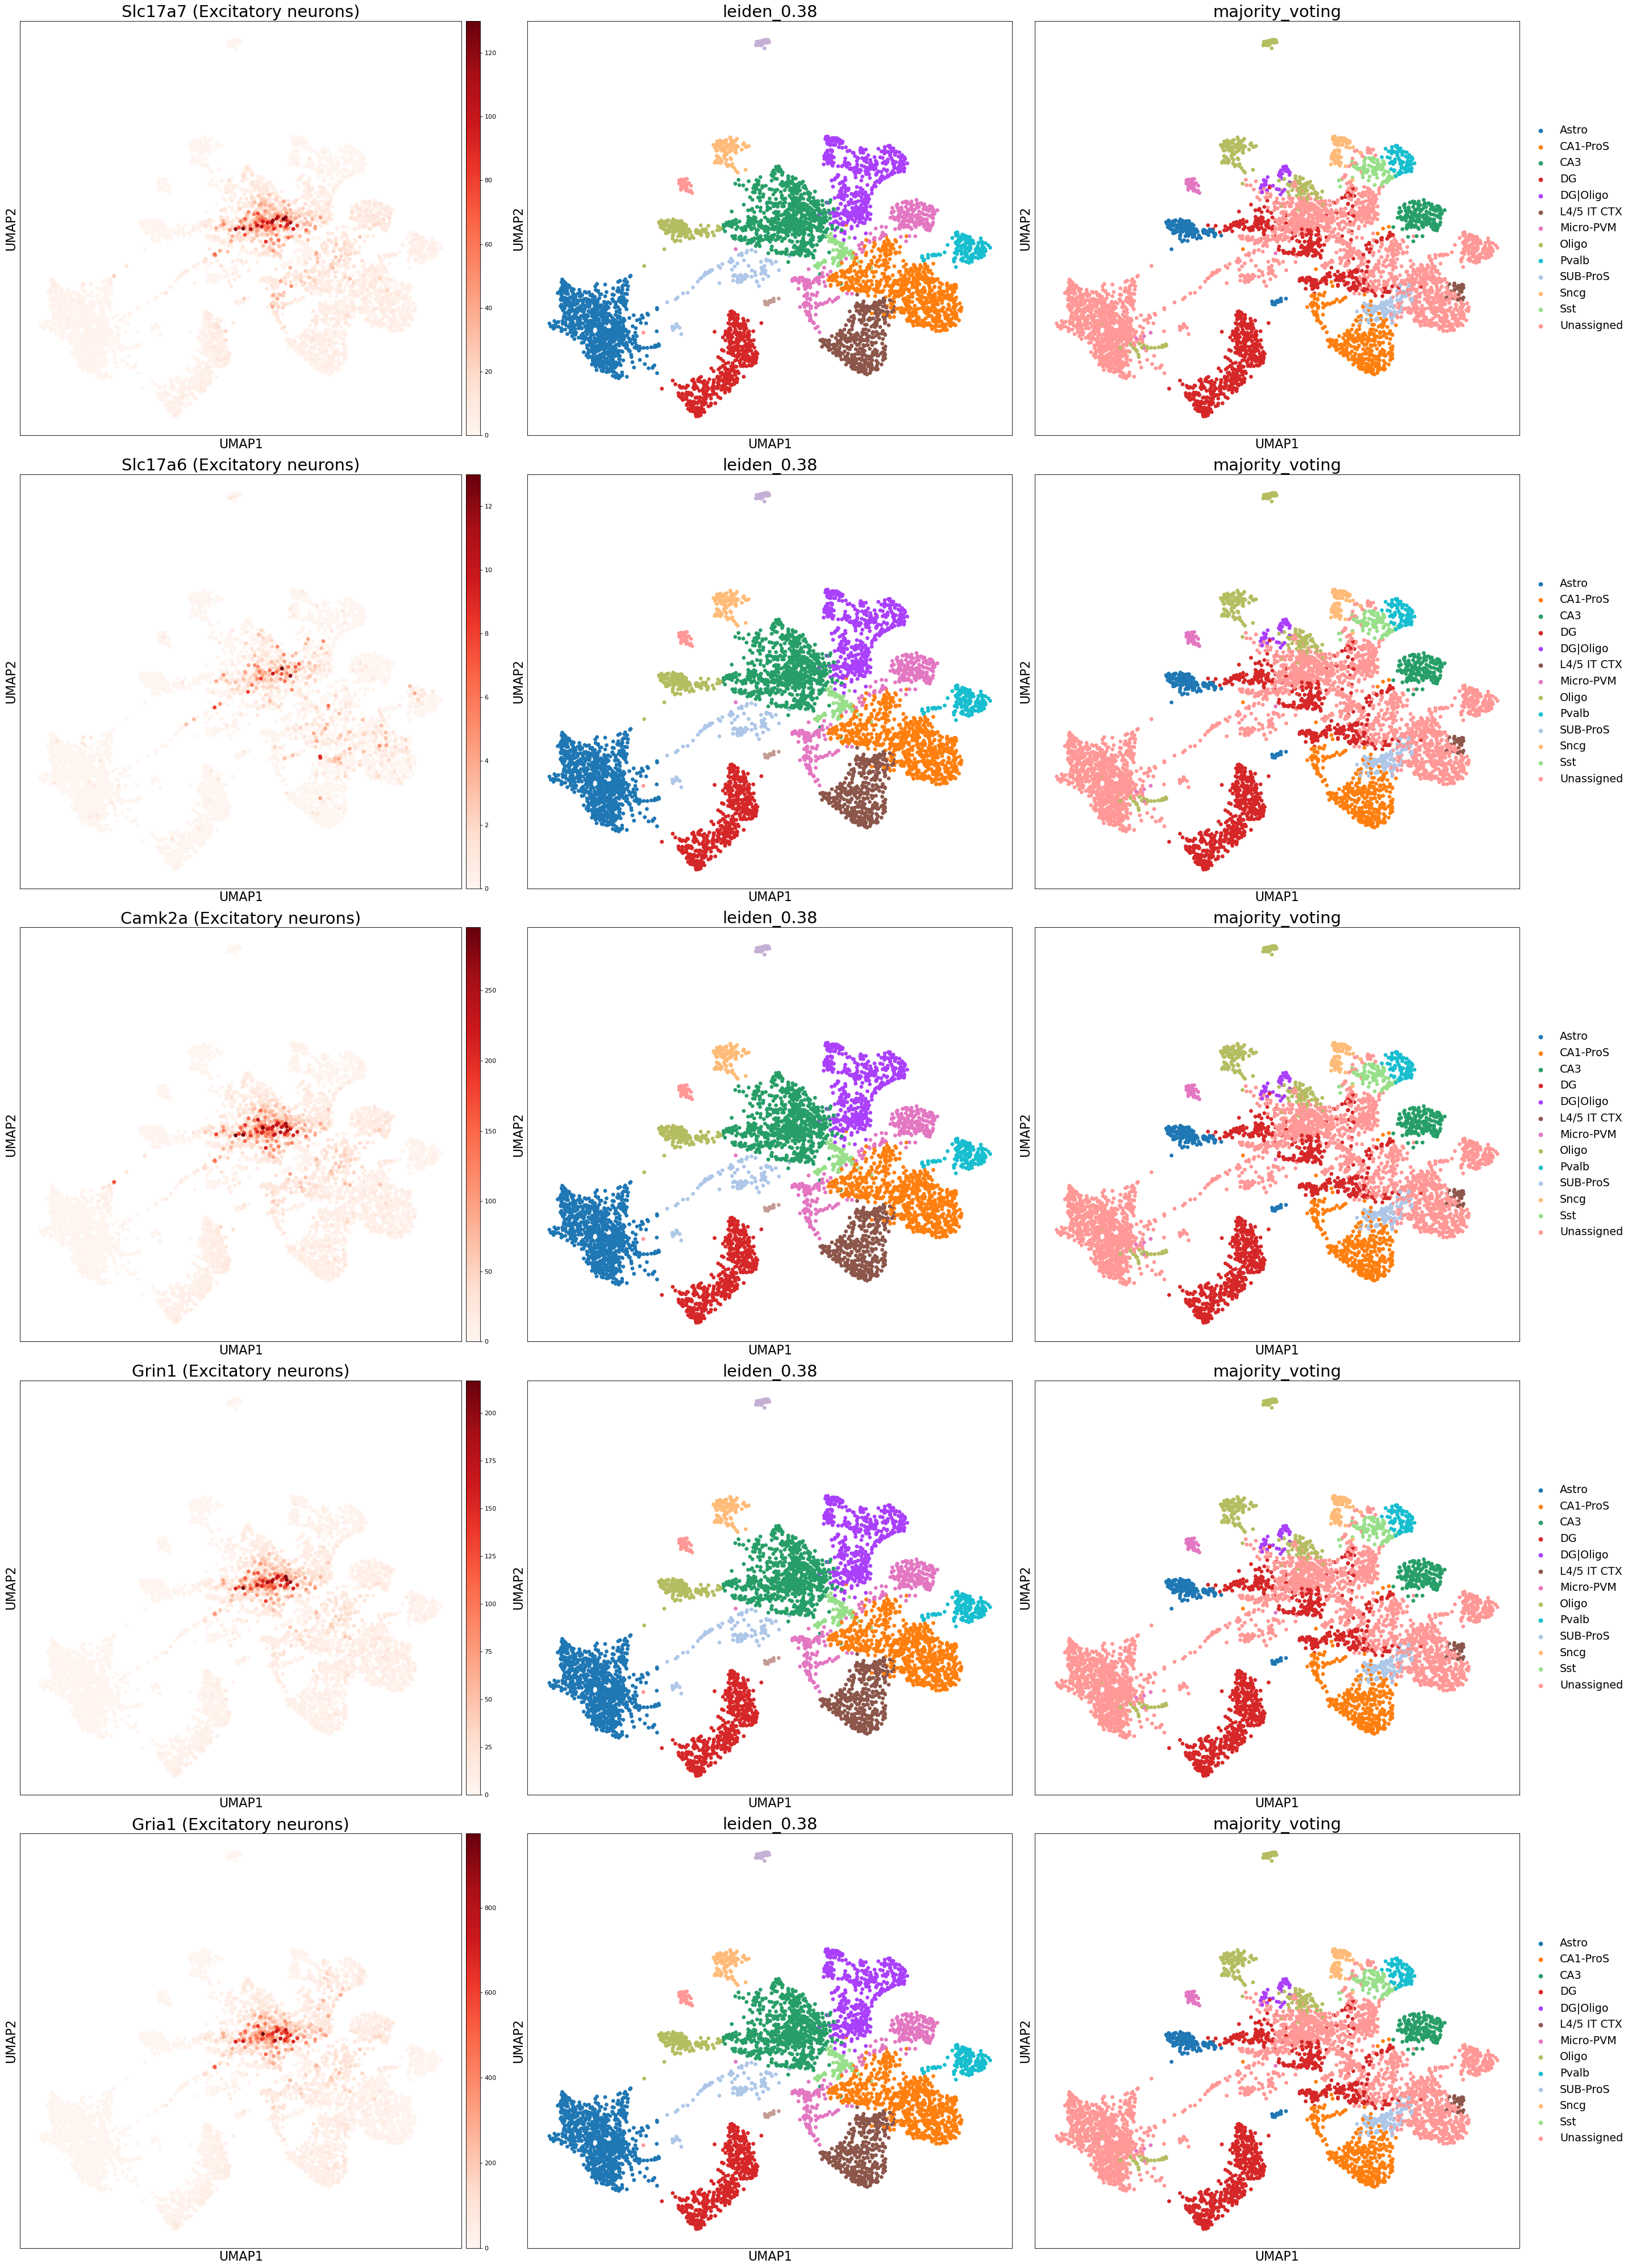

In [43]:
def plot_marker_genes(adata, selected_cell_type, markers_dict):
    all_genes_to_plot = []

    if selected_cell_type in markers_dict:
        valid_genes = [gene for gene in markers_dict[selected_cell_type] if gene in adata.var_names]
        all_genes_to_plot = [(gene, selected_cell_type) for gene in valid_genes]

    n_rows = len(all_genes_to_plot)
    n_cols = 3  # Always 3 plots per row

    if n_rows > 0:
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(12*n_cols, 10*n_rows), dpi=80)

        for i, (gene, cell_type) in enumerate(all_genes_to_plot):
            row_axes = axes[i] if n_rows > 1 else axes #handle the case of a single row

            try:
                # Plot the marker gene
                sc.pl.umap(adata, color=gene, ax=row_axes[0], 
                            title=f"{gene} ({cell_type})", cmap='Reds', show=False,
                            size=150)
                row_axes[0].set_xlabel("UMAP1", fontsize=20)
                row_axes[0].set_ylabel("UMAP2", fontsize=20)
                row_axes[0].tick_params(axis='both', which='major', labelsize=18)
                row_axes[0].set_title(f"{gene} ({cell_type})", fontsize=26)

                # Plot leiden_0.38
                sc.pl.umap(adata, color='leiden_0.38', ax=row_axes[1], 
                            title='leiden_0.38', show=False, size=150, legend_loc = 'none')
                row_axes[1].set_xlabel("UMAP1", fontsize=20)
                row_axes[1].set_ylabel("UMAP2", fontsize=20)
                row_axes[1].tick_params(axis='both', which='major', labelsize=18)
                row_axes[1].set_title('leiden_0.38', fontsize=26)

                # Plot majority_voting
                sc.pl.umap(adata, color='majority_voting', ax=row_axes[2], 
                            title='majority_voting', show=False, size=150, legend_fontsize='xx-large', legend_loc = 'right margin')
                row_axes[2].set_xlabel("UMAP1", fontsize=20)
                row_axes[2].set_ylabel("UMAP2", fontsize=20)
                row_axes[2].tick_params(axis='both', which='major', labelsize=18)
                row_axes[2].set_title('majority_voting', fontsize=26)

            except Exception as e:
                print(f"Error plotting: {e}")

        plt.tight_layout()
        plt.show()

plot_marker_genes(adata, selected_cell_type, markers_dict)

In [ ]:
plot_marker_genes(adata, selected_cell_type, markers_dict)